In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

plt.rcParams['figure.figsize']=(10,5)
plt.rcParams['figure.dpi']=100

###  Loading The DataSet

In [2]:
df=pd.read_csv("forestfires.csv")
df.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small


### EDA

In [3]:
df.describe()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,...,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292,0.164410,...,0.017408,0.038685,0.003868,0.061896,0.032882,0.104449,0.003868,0.001934,0.029014,0.332689
std,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818,0.371006,...,0.130913,0.193029,0.062137,0.241199,0.178500,0.306138,0.062137,0.043980,0.168007,0.471632
min,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [4]:
df.isnull().sum()

month            0
day              0
FFMC             0
DMC              0
DC               0
ISI              0
temp             0
RH               0
wind             0
rain             0
area             0
dayfri           0
daymon           0
daysat           0
daysun           0
daythu           0
daytue           0
daywed           0
monthapr         0
monthaug         0
monthdec         0
monthfeb         0
monthjan         0
monthjul         0
monthjun         0
monthmar         0
monthmay         0
monthnov         0
monthoct         0
monthsep         0
size_category    0
dtype: int64

In [5]:
df.duplicated().sum()

8

In [6]:
df[df.duplicated(keep='first')]

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
53,aug,wed,92.1,111.2,654.1,9.6,20.4,42,4.9,0.0,...,0,0,0,0,0,0,0,0,0,small
100,aug,sun,91.4,142.4,601.4,10.6,19.8,39,5.4,0.0,...,0,0,0,0,0,0,0,0,0,small
215,mar,sat,91.7,35.8,80.8,7.8,17.0,27,4.9,0.0,...,0,0,0,0,1,0,0,0,0,large
303,jun,fri,91.1,94.1,232.1,7.1,19.2,38,4.5,0.0,...,0,0,0,1,0,0,0,0,0,small
426,aug,thu,91.6,248.4,753.8,6.3,20.4,56,2.2,0.0,...,0,0,0,0,0,0,0,0,0,small
461,aug,sat,93.7,231.1,715.1,8.4,18.9,64,4.9,0.0,...,0,0,0,0,0,0,0,0,0,small
501,aug,tue,96.1,181.1,671.2,14.3,21.6,65,4.9,0.8,...,0,0,0,0,0,0,0,0,0,small
508,aug,fri,91.0,166.9,752.6,7.1,25.9,41,3.6,0.0,...,0,0,0,0,0,0,0,0,0,small


In [7]:
# deleting the duplicated record

In [8]:
df.drop_duplicates(inplace=True)

In [9]:
df.duplicated().sum()

0

###  Dropping the unnecessary column

In [10]:
df.head(2)

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small


In [11]:
df.drop(columns=['month','day'],inplace=True)

In [12]:
df.head()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,1,...,0,0,0,0,1,0,0,0,0,small
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,0,...,0,0,0,0,0,0,0,1,0,small
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,0,...,0,0,0,0,0,0,0,1,0,small
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,1,...,0,0,0,0,1,0,0,0,0,small
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,0,...,0,0,0,0,1,0,0,0,0,small


### Visualizing The graph

<Axes: xlabel='area', ylabel='Density'>

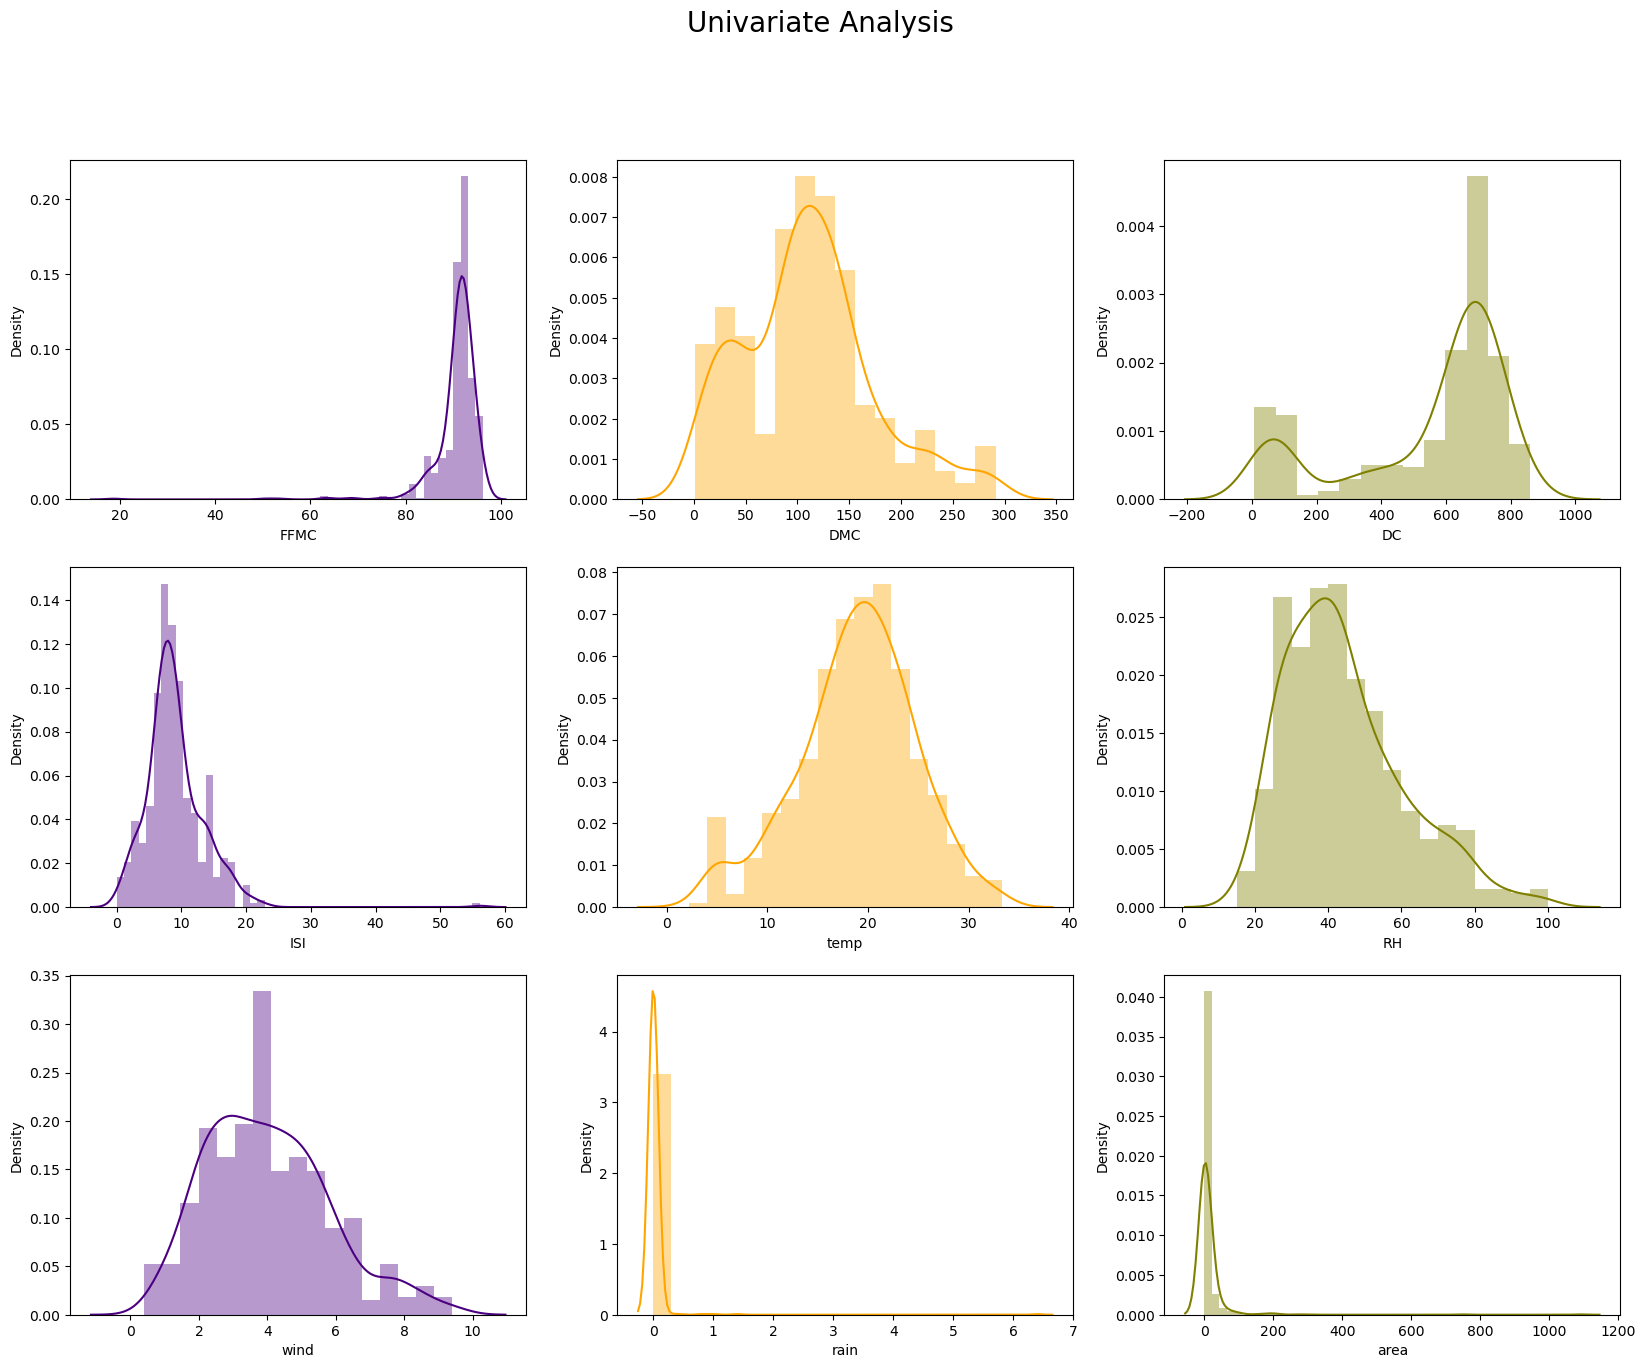

In [13]:
fig, axes = plt.subplots(3, 3, figsize=(20, 15))
fig.suptitle('Univariate Analysis',fontsize=20)
sns.distplot(df['FFMC'],ax=axes[0,0],color='indigo')
sns.distplot(df['DMC'],ax=axes[0,1],color='orange')
sns.distplot(df['DC'],ax=axes[0,2],color='olive')
sns.distplot(df['ISI'],ax=axes[1,0],color='indigo')
sns.distplot(df['temp'],ax=axes[1,1],color='orange')
sns.distplot(df['RH'],ax=axes[1,2],color='olive')
sns.distplot(df['wind'],ax=axes[2,0],color='indigo')
sns.distplot(df['rain'],ax=axes[2,1],color='orange')
sns.distplot(df['area'],ax=axes[2,2],color='olive')

### Converting The target column into numerical  

In [14]:
df['size_category']=df['size_category'].map({'small':0,'large':1})
df

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,1,...,0,0,0,0,1,0,0,0,0,0
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,0,...,0,0,0,0,0,0,0,1,0,0
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,0,...,0,0,0,0,0,0,0,1,0,0
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,1,...,0,0,0,0,1,0,0,0,0,0
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,0,...,0,0,0,0,0,0,0,0,0,1
513,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,0,...,0,0,0,0,0,0,0,0,0,1
514,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,0,...,0,0,0,0,0,0,0,0,0,1
515,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,0,...,0,0,0,0,0,0,0,0,0,0


In [15]:
x=df.iloc[:,:-1]
y=df['size_category']

### Feature Scaling 

In [16]:
sc=StandardScaler()
x=sc.fit_transform(x)
x

array([[-7.96039810e-01, -1.31838569e+00, -1.82893094e+00, ...,
        -4.43678255e-02, -1.74253759e-01, -7.14412875e-01],
       [-3.25665522e-03, -1.17405250e+00,  4.89256926e-01, ...,
        -4.43678255e-02,  5.73875712e+00, -7.14412875e-01],
       [-3.25665522e-03, -1.04383887e+00,  5.61044929e-01, ...,
        -4.43678255e-02,  5.73875712e+00, -7.14412875e-01],
       ...,
       [-1.62485856e+00, -8.39889805e-01,  4.75141308e-01, ...,
        -4.43678255e-02, -1.74253759e-01, -7.14412875e-01],
       [ 6.81419706e-01,  5.61083388e-01,  2.69859884e-01, ...,
        -4.43678255e-02, -1.74253759e-01, -7.14412875e-01],
       [-2.00323234e+00, -1.68235633e+00, -1.77892132e+00, ...,
         2.25388553e+01, -1.74253759e-01, -7.14412875e-01]])

In [17]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.25,random_state=1)

In [18]:
# Initialize the ANN mode

In [19]:
ann=Sequential()

In [20]:
# Create the Hidden Layer

In [21]:
ann.add(Dense(units=10,activation='relu'))

In [22]:
# Create the output layer

In [23]:
ann.add(Dense(units=1,activation='sigmoid'))

In [24]:
#Established the connection between all the layer

In [25]:
ann.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [26]:
# Train ANN

In [27]:
ann.fit(xtrain,ytrain,epochs=250,validation_data=(xtest,ytest))

Epoch 1/250
12/12 [==============================] - 2s 49ms/step - loss: 0.7583 - accuracy: 0.5328 - val_loss: 0.7833 - val_accuracy: 0.4922
Epoch 2/250
12/12 [==============================] - 0s 7ms/step - loss: 0.7241 - accuracy: 0.5617 - val_loss: 0.7543 - val_accuracy: 0.5156
Epoch 3/250
12/12 [==============================] - 0s 5ms/step - loss: 0.6978 - accuracy: 0.5906 - val_loss: 0.7290 - val_accuracy: 0.5469
Epoch 4/250
12/12 [==============================] - 0s 5ms/step - loss: 0.6745 - accuracy: 0.6142 - val_loss: 0.7084 - val_accuracy: 0.5781
Epoch 5/250
12/12 [==============================] - 0s 5ms/step - loss: 0.6562 - accuracy: 0.6430 - val_loss: 0.6910 - val_accuracy: 0.5938
Epoch 6/250
12/12 [==============================] - 0s 5ms/step - loss: 0.6409 - accuracy: 0.6562 - val_loss: 0.6763 - val_accuracy: 0.6250
Epoch 7/250
12/12 [==============================] - 0s 6ms/step - loss: 0.6272 - accuracy: 0.6850 - val_loss: 0.6651 - val_accuracy: 0.6328
Epoch 8/250


Epoch 59/250
12/12 [==============================] - 0s 6ms/step - loss: 0.4165 - accuracy: 0.8031 - val_loss: 0.5292 - val_accuracy: 0.7734
Epoch 60/250
12/12 [==============================] - 0s 5ms/step - loss: 0.4140 - accuracy: 0.8031 - val_loss: 0.5291 - val_accuracy: 0.7734
Epoch 61/250
12/12 [==============================] - 0s 5ms/step - loss: 0.4112 - accuracy: 0.8031 - val_loss: 0.5286 - val_accuracy: 0.7734
Epoch 62/250
12/12 [==============================] - 0s 5ms/step - loss: 0.4087 - accuracy: 0.8084 - val_loss: 0.5279 - val_accuracy: 0.7734
Epoch 63/250
12/12 [==============================] - 0s 6ms/step - loss: 0.4062 - accuracy: 0.8110 - val_loss: 0.5262 - val_accuracy: 0.7734
Epoch 64/250
12/12 [==============================] - 0s 5ms/step - loss: 0.4036 - accuracy: 0.8136 - val_loss: 0.5248 - val_accuracy: 0.7734
Epoch 65/250
12/12 [==============================] - 0s 5ms/step - loss: 0.4010 - accuracy: 0.8136 - val_loss: 0.5249 - val_accuracy: 0.7734
Epoch 

12/12 [==============================] - 0s 7ms/step - loss: 0.2735 - accuracy: 0.8950 - val_loss: 0.5104 - val_accuracy: 0.7812
Epoch 117/250
12/12 [==============================] - 0s 6ms/step - loss: 0.2708 - accuracy: 0.8976 - val_loss: 0.5105 - val_accuracy: 0.7812
Epoch 118/250
12/12 [==============================] - 0s 5ms/step - loss: 0.2686 - accuracy: 0.8976 - val_loss: 0.5106 - val_accuracy: 0.7812
Epoch 119/250
12/12 [==============================] - 0s 7ms/step - loss: 0.2663 - accuracy: 0.8976 - val_loss: 0.5105 - val_accuracy: 0.7812
Epoch 120/250
12/12 [==============================] - 0s 11ms/step - loss: 0.2641 - accuracy: 0.9003 - val_loss: 0.5117 - val_accuracy: 0.7812
Epoch 121/250
12/12 [==============================] - 0s 9ms/step - loss: 0.2620 - accuracy: 0.9003 - val_loss: 0.5106 - val_accuracy: 0.7812
Epoch 122/250
12/12 [==============================] - 0s 8ms/step - loss: 0.2601 - accuracy: 0.9003 - val_loss: 0.5101 - val_accuracy: 0.7812
Epoch 123/25

12/12 [==============================] - 0s 6ms/step - loss: 0.1765 - accuracy: 0.9265 - val_loss: 0.5153 - val_accuracy: 0.7969
Epoch 174/250
12/12 [==============================] - 0s 6ms/step - loss: 0.1752 - accuracy: 0.9291 - val_loss: 0.5149 - val_accuracy: 0.8047
Epoch 175/250
12/12 [==============================] - 0s 6ms/step - loss: 0.1738 - accuracy: 0.9318 - val_loss: 0.5167 - val_accuracy: 0.8047
Epoch 176/250
12/12 [==============================] - 0s 13ms/step - loss: 0.1726 - accuracy: 0.9291 - val_loss: 0.5152 - val_accuracy: 0.8047
Epoch 177/250
12/12 [==============================] - 0s 5ms/step - loss: 0.1713 - accuracy: 0.9291 - val_loss: 0.5161 - val_accuracy: 0.7969
Epoch 178/250
12/12 [==============================] - 0s 5ms/step - loss: 0.1700 - accuracy: 0.9265 - val_loss: 0.5158 - val_accuracy: 0.8047
Epoch 179/250
12/12 [==============================] - 0s 5ms/step - loss: 0.1694 - accuracy: 0.9344 - val_loss: 0.5175 - val_accuracy: 0.7969
Epoch 180/25

12/12 [==============================] - 0s 6ms/step - loss: 0.1187 - accuracy: 0.9738 - val_loss: 0.5301 - val_accuracy: 0.8359
Epoch 231/250
12/12 [==============================] - 0s 5ms/step - loss: 0.1178 - accuracy: 0.9738 - val_loss: 0.5300 - val_accuracy: 0.8359
Epoch 232/250
12/12 [==============================] - 0s 5ms/step - loss: 0.1171 - accuracy: 0.9738 - val_loss: 0.5311 - val_accuracy: 0.8359
Epoch 233/250
12/12 [==============================] - 0s 5ms/step - loss: 0.1167 - accuracy: 0.9738 - val_loss: 0.5288 - val_accuracy: 0.8359
Epoch 234/250
12/12 [==============================] - 0s 6ms/step - loss: 0.1157 - accuracy: 0.9738 - val_loss: 0.5309 - val_accuracy: 0.8281
Epoch 235/250
12/12 [==============================] - 0s 7ms/step - loss: 0.1148 - accuracy: 0.9764 - val_loss: 0.5342 - val_accuracy: 0.8281
Epoch 236/250
12/12 [==============================] - 0s 5ms/step - loss: 0.1139 - accuracy: 0.9764 - val_loss: 0.5330 - val_accuracy: 0.8359
Epoch 237/250

In [28]:
ypred=ann.predict(xtest)
ypred

4/4 [==============================] - 0s 2ms/step


array([[1.6758401e-02],
       [2.2965450e-02],
       [1.2386581e-03],
       [2.7152619e-01],
       [4.6077853e-01],
       [2.1325698e-02],
       [2.6322436e-01],
       [3.2475922e-02],
       [9.9944603e-01],
       [1.8290536e-02],
       [1.0023323e-02],
       [2.3849590e-02],
       [2.6444376e-02],
       [2.0981382e-01],
       [1.8413723e-01],
       [6.0639644e-01],
       [5.0027037e-01],
       [9.9999893e-01],
       [2.0548968e-02],
       [5.1909968e-02],
       [9.7307220e-02],
       [1.4396155e-01],
       [5.0096154e-01],
       [1.1138927e-01],
       [8.6665951e-02],
       [4.7710910e-02],
       [3.3694347e-03],
       [3.0025659e-02],
       [2.4152583e-01],
       [8.0308377e-10],
       [3.1977884e-02],
       [1.1019534e-02],
       [4.8168650e-01],
       [1.8349959e-02],
       [6.0254958e-04],
       [9.9944609e-01],
       [2.1598857e-02],
       [7.3734599e-01],
       [5.2888136e-02],
       [1.7052125e-02],
       [1.3350908e-02],
       [1.745190

In [29]:
ypred=ypred>0.5
ypred

array([[False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [

In [30]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.85      0.95      0.90        95
           1       0.77      0.52      0.62        33

    accuracy                           0.84       128
   macro avg       0.81      0.73      0.76       128
weighted avg       0.83      0.84      0.82       128



### Hyperparameter Tuning

In [31]:
early=EarlyStopping(monitor='val_loss',mode='min',patience=25)

In [32]:
ann=Sequential()
ann.add(Dense(units=10,activation='relu'))
ann.add(Dense(units=1,activation='relu'))
ann.compile(optimizer='adam',loss='binary_crossentropy')

In [33]:
ann.fit(xtrain,ytrain,epochs=250,validation_data=(xtest,ytest),callbacks=[early])

Epoch 1/250
12/12 [==============================] - 1s 17ms/step - loss: 4.1747 - val_loss: 3.1649
Epoch 2/250
12/12 [==============================] - 0s 8ms/step - loss: 3.9524 - val_loss: 3.0647
Epoch 3/250
12/12 [==============================] - 0s 5ms/step - loss: 3.8393 - val_loss: 3.3182
Epoch 4/250
12/12 [==============================] - 0s 5ms/step - loss: 3.7441 - val_loss: 3.3085
Epoch 5/250
12/12 [==============================] - 0s 5ms/step - loss: 3.6727 - val_loss: 3.1229
Epoch 6/250
12/12 [==============================] - 0s 5ms/step - loss: 3.5858 - val_loss: 3.0980
Epoch 7/250
12/12 [==============================] - 0s 6ms/step - loss: 3.5614 - val_loss: 3.0132
Epoch 8/250
12/12 [==============================] - 0s 5ms/step - loss: 3.5495 - val_loss: 3.0082
Epoch 9/250
12/12 [==============================] - 0s 5ms/step - loss: 3.5428 - val_loss: 3.0002
Epoch 10/250
12/12 [==============================] - 0s 5ms/step - loss: 3.5369 - val_loss: 2.9899
Epoch 11

12/12 [==============================] - 0s 5ms/step - loss: 2.2974 - val_loss: 1.4502
Epoch 84/250
12/12 [==============================] - 0s 5ms/step - loss: 2.2962 - val_loss: 1.4499
Epoch 85/250
12/12 [==============================] - 0s 5ms/step - loss: 2.2942 - val_loss: 1.4566
Epoch 86/250
12/12 [==============================] - 0s 5ms/step - loss: 2.2916 - val_loss: 1.4575
Epoch 87/250
12/12 [==============================] - 0s 5ms/step - loss: 2.2890 - val_loss: 1.4618
Epoch 88/250
12/12 [==============================] - 0s 5ms/step - loss: 2.2865 - val_loss: 1.4688
Epoch 89/250
12/12 [==============================] - 0s 5ms/step - loss: 2.2847 - val_loss: 1.5443
Epoch 90/250
12/12 [==============================] - 0s 6ms/step - loss: 2.2831 - val_loss: 1.5447
Epoch 91/250
12/12 [==============================] - 0s 6ms/step - loss: 2.2813 - val_loss: 1.5447
Epoch 92/250
12/12 [==============================] - 0s 5ms/step - loss: 2.2799 - val_loss: 1.5458
Epoch 93/250


In [34]:
# check reduce error or not 

<Axes: >

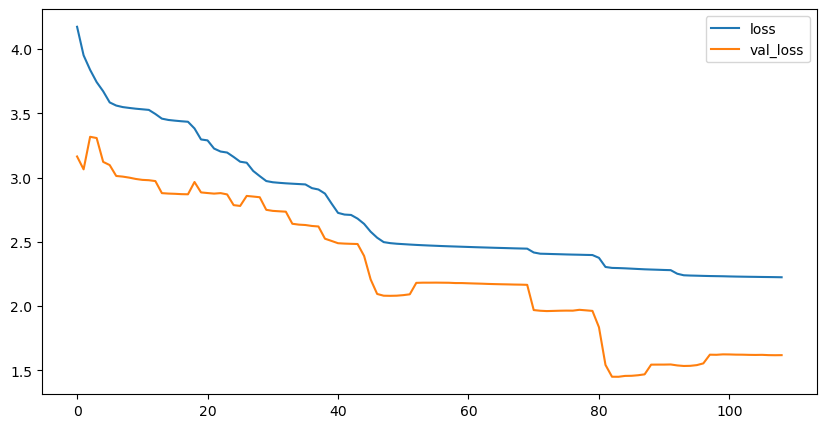

In [35]:
early_loss=pd.DataFrame(ann.history.history)
early_loss.plot()